In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
starbucks = pd.read_csv("clean_starbucks.csv")

In [3]:
starbucks

,product_name,size,milk,whip,serv_size_m_l,calories,total_fat_g,saturated_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,total_carbs_g,fiber_g,sugar_g,caffeine_mg,Category
0,brewed coffee - dark roast,short,0,0,236,3,0.1,0.0,0.0,0,5,0,0,0,130,coffee
1,brewed coffee - dark roast,tall,0,0,354,4,0.1,0.0,0.0,0,10,0,0,0,193,coffee
2,brewed coffee - dark roast,grande,0,0,473,5,0.1,0.0,0.0,0,10,0,0,0,260,coffee
3,brewed coffee - dark roast,venti,0,0,591,5,0.1,0.0,0.0,0,10,0,0,0,340,coffee
4,brewed coffee - decaf pike place roast,short,0,0,236,3,0.1,0.0,0.0,0,5,0,0,0,15,coffee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,White Hot Chocolate,venti,4,0,591,450,17.0,15.0,0.0,5,310,71,0,69,0,chocolate
1143,White Hot Chocolate,venti,4,1,591,520,24.0,20.0,0.2,30,320,73,0,71,0,chocolate
1144,Protein & Fibre Powder,1 scoop,0,0,0,30,0.1,0.1,0.0,0,45,1,1,0,0,other
1145,Matcha Green Tea Powder,1 scoop,0,0,0,25,0.1,0.0,0.0,0,0,6,0,5,25,tea


In [4]:
z = starbucks.Category
product_names = starbucks.product_name
sizes = starbucks.size

# On enlève la catégories et les variables qualitatives
starbucks.drop(columns=["Category", "product_name", "size"], inplace=True)



In [5]:
#starbucks.drop(columns=["milk", "whip"], inplace=True)
starbucks.columns

Index(['milk', 'whip', 'serv_size_m_l', 'calories', 'total_fat_g',
       'saturated_fat_g', 'trans_fat_g', 'cholesterol_mg', 'sodium_mg',
       'total_carbs_g', 'fiber_g', 'sugar_g', 'caffeine_mg'],
      dtype='object')

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from utils.knn_validation import knn_multiple_validation

# on veut trouver le nombre de voisins le plus optimisé, pour cela on utilise la validation multiple
train_size = 0.9
n_splits = 10
gen = knn_multiple_validation(starbucks, z, n_splits, train_size, np.arange(1,100,1))

df = pd.DataFrame(gen, columns=["nbr_neighbors", "accuracy", "degre_liberte"])
df

# Cepandant la validation multiple peut avoir des bias en sur ou sous représentant des exemples

,nbr_neighbors,accuracy,degre_liberte
0,1,0.930435,1032.000000
1,2,0.886957,516.000000
2,3,0.895652,344.000000
3,4,0.895652,258.000000
4,5,0.878261,206.400000
...,...,...,...
985,95,0.747826,10.863158
986,96,0.747826,10.750000
987,97,0.747826,10.639175
988,98,0.747826,10.530612


In [7]:
Kopt = df.groupby("nbr_neighbors").mean().accuracy.idxmax()
Kopt

1

<Axes: xlabel='degre_liberte', ylabel='accuracy'>

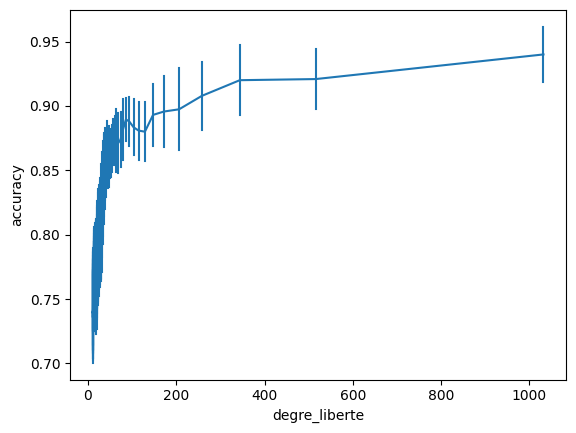

In [8]:
sns.lineplot(x="degre_liberte", y="accuracy", err_style='bars', errorbar="sd", data=df)

<Axes: xlabel='nbr_neighbors', ylabel='accuracy'>

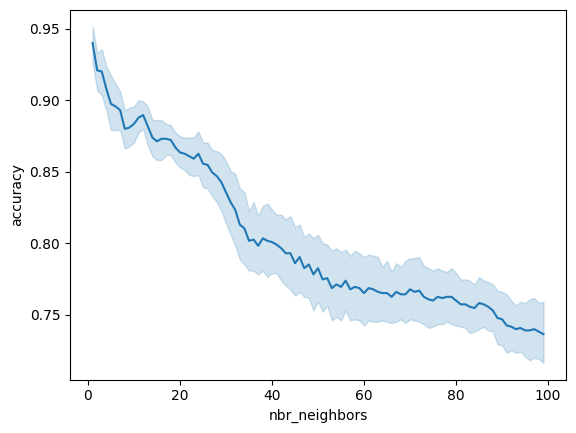

In [9]:
sns.lineplot(x="nbr_neighbors", y="accuracy", data=df)

1

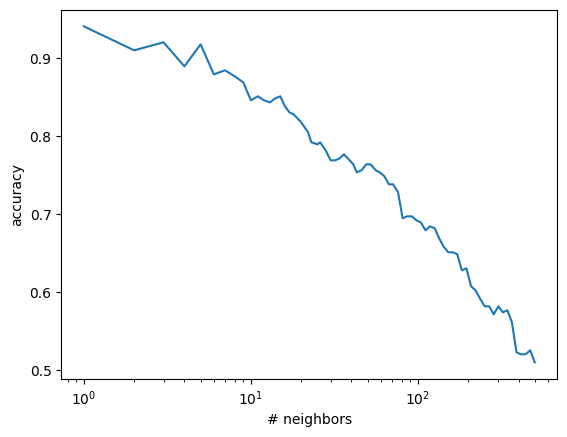

In [10]:
# Simple Validation
from utils.knn_validation import knn_simple_validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(starbucks, z, train_size=0.66)
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500,100)).astype(int))
gen = knn_simple_validation(X_train, y_train, X_val, y_val,n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])

sp = sns.lineplot(x="# neighbors", y="accuracy", data=df)
sp.set(xscale="log")

Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

1

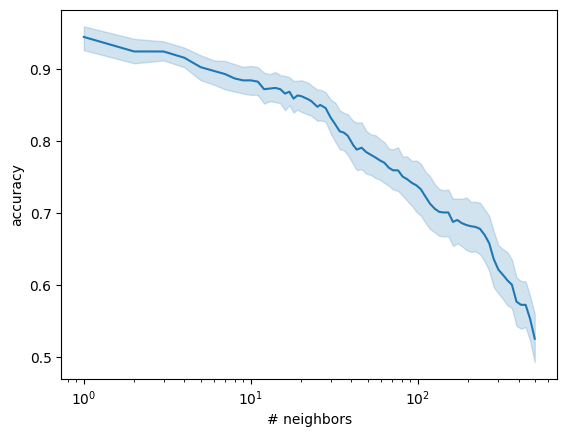

In [11]:
# Cross Validation
from utils.knn_cross_validation import knn_cross_validation
n_folds = 10
gen = knn_cross_validation(starbucks, z, n_folds, n_neighbors_list)
df_cross = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
sp = sns.lineplot(x="# neighbors", y="accuracy", data=df_cross)
sp.set(xscale="log")
Kopt = df_cross.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

/tmp/ipykernel_82441/1191475655.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sp = sns.lineplot(x="# neighbors", y="accuracy", err_style="bars", ci="sd", data=df)


1

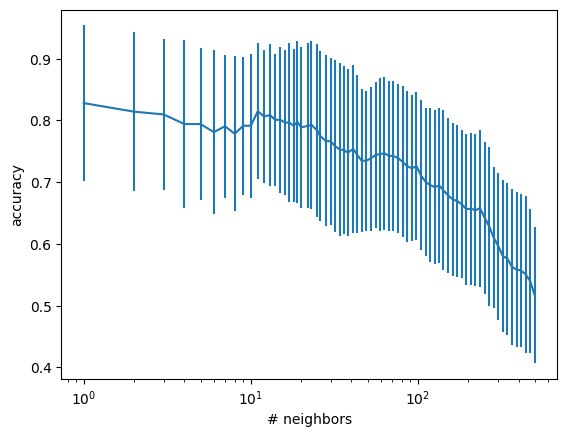

In [12]:
from sklearn.model_selection import cross_val_score
from utils.knn_cross_validation import knn_cross_validation2
n_folds = 10
gen = knn_cross_validation2(starbucks, z, n_folds, n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])

sp = sns.lineplot(x="# neighbors", y="accuracy", err_style="bars", ci="sd", data=df)
sp.set(xscale="log")

Kopt = df.groupby("# neighbors").mean().accuracy.idxmax()
Kopt

In [13]:
# On part avec k = 1
# Sans validation croisée

from sklearn import preprocessing 
X_train, X_test, z_train, z_test = train_test_split(starbucks, z, test_size=0.33, random_state=42)

#cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, starbucks, z, cv=5)#, scoring='f1_macro')


knn.fit(X_train, z_train)


z_pred = knn.predict(X_test)

z_comp = pd.DataFrame({"Realite": z_test, "Prediction": z_pred})


from sklearn.metrics import accuracy_score
print(f"Précision: {accuracy_score(z_pred, z_test)} ou {knn.score(X_test, z_test)}")

z_failed = z_comp.loc[z_comp["Prediction"] != z_comp["Realite"]]
print(f"Nombre de prédiction ratées: {len(z_failed)}")
z_failed
print(scores)

Précision: 0.9472295514511874 ou 0.9472295514511874
Nombre de prédiction ratées: 20
[0.60434783 0.78695652 0.83842795 0.86899563 0.58515284]


In [14]:
# Avec validation croisée : même résultat

from sklearn.model_selection import GridSearchCV

# De 1 à 500 voisins (exclu), échelle logarithmique
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500,100)).astype(int))
param_grid = {"n_neighbors": n_neighbors_list}

cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
search.fit(X_train, z_train)
print(search.best_params_)

z_pred = search.predict(X_test)
accuracy_score(z_pred, z_test)

{'n_neighbors': 1}


0.9472295514511874

In [15]:
# faire boxplot en fonction d'accuracy et model avec validation croisée

In [16]:
# on refait validation croisée sans la catégorie other

starbucks_noothers = pd.read_csv("clean_starbucks.csv")
starbucks_noothers.drop(starbucks_noothers[starbucks_noothers.Category == "other"].index,axis=0, inplace=True)
starbucks_noothers.reset_index(inplace=True)

y = starbucks_noothers.Category

# On enlève la catégories et les variables qualitatives
starbucks_noothers.drop(columns=["Category", "product_name", "size"], inplace=True)



In [17]:
X_train, X_test, y_train, y_test = train_test_split(starbucks_noothers, y, test_size=0.33, random_state=40)

search = GridSearchCV(cls, param_grid, scoring='accuracy', cv=10)
search.fit(X_train, y_train)

y_pred = search.predict(X_test)
print(f'précision:{accuracy_score(y_pred, y_test)}')

y_comp = pd.DataFrame({"Reel": y_test, "Pred": y_pred})
y_comp.loc[y_comp.Pred != y_comp.Reel]

précision:0.9945652173913043


,Reel,Pred
1111,tea,coffee
843,frappuccino,coffee


In [18]:
print(y_comp.Reel.unique())
nbr_cats = y_test.value_counts().to_frame(name="Count").transpose()
nbr_cats

['tea' 'frappuccino' 'coffee' 'chocolate']


,coffee,frappuccino,tea,chocolate
Count,166,95,77,30


In [24]:
mat_comp = y_comp.groupby(['Reel','Pred']).size().unstack().fillna(0).astype(int)
print(mat_comp)

mat_comp.iloc[0] / nbr_cats.iloc[0]

mat_comp_per = mat_comp.apply(lambda row: (row / nbr_cats.iloc[0]) * 100)
mat_comp_per.index.name = "Realité"
mat_comp_per.columns.name = "Prediction"
mat_comp_per.applymap(lambda x: round(x,3))

Pred         chocolate  coffee  frappuccino  tea
Reel                                            
chocolate           30       0            0    0
coffee               0     166            0    0
frappuccino          0       1           94    0
tea                  0       1            0   76


Prediction,chocolate,coffee,frappuccino,tea
Realité,,,,
chocolate,100.0,0.000,0.000,0.000
coffee,0.0,100.000,0.000,0.000
frappuccino,0.0,1.053,98.947,0.000
tea,0.0,1.299,0.000,98.701


<Axes: xlabel='Prediction', ylabel='Realité'>

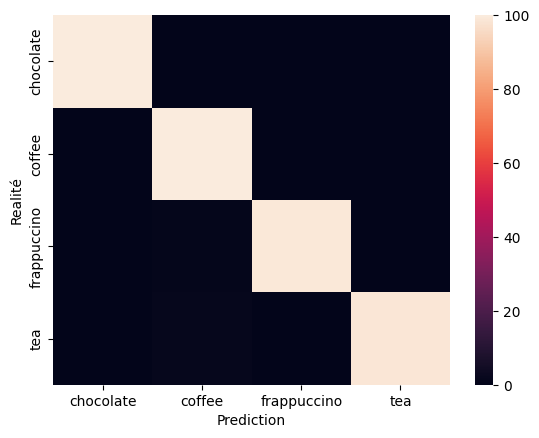

In [25]:
sns.heatmap(mat_comp_per)

In [26]:
# Heatmap avec others

nbr_cats2 = z_test.value_counts().to_frame(name="Count").transpose()
print(nbr_cats2)
mat_comp2 = z_comp.groupby(["Realite", "Prediction"]).size().unstack().fillna(0).astype(int)
print(mat_comp2)


mat_comp_per2 = mat_comp2.apply(lambda row: (row / nbr_cats2.iloc[0]) * 100)
mat_comp_per2.index.name = "Realite"
mat_comp_per2.columns.name = "Prediction"
mat_comp_per2.applymap(lambda x: round(x,1))

       coffee  frappuccino  tea  chocolate  other
Count     171           99   70         28     11
Prediction   chocolate  coffee  frappuccino  other  tea
Realite                                                
chocolate           26       0            1      0    1
coffee               0     165            5      0    1
frappuccino          0       1           98      0    0
other                1       0            1      9    0
tea                  0       2            0      7   61


Prediction,chocolate,coffee,frappuccino,other,tea
Realite,,,,,
chocolate,92.9,0.0,3.6,0.0,3.6
coffee,0.0,96.5,2.9,0.0,0.6
frappuccino,0.0,1.0,99.0,0.0,0.0
other,9.1,0.0,9.1,81.8,0.0
tea,0.0,2.9,0.0,10.0,87.1


<Axes: xlabel='Prediction', ylabel='Realite'>

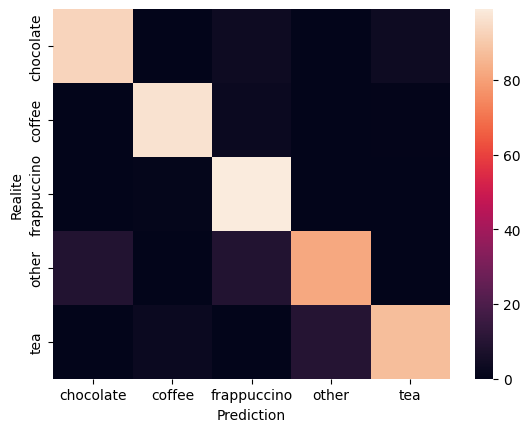

In [27]:
# Heatmap avec others

sns.heatmap(mat_comp_per2)